In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [4]:
d = pd.read_csv('D:/Jupyter-Notebook-Crash-Course/Datasets/spambase.csv')


In [5]:
predictors = d.drop(['spam'], axis=1)
target = d["spam"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
X_test.shape
Y_test.shape

(3680, 57)


(921,)

In [6]:
# Create logistic regression object
logistic_regression = LogisticRegression(solver="liblinear",
random_state=0)
# Train model
model = logistic_regression.fit(X_train, Y_train)
#Predictions
Y_pred = model.predict(X_test)

In [7]:
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,
target_names=target_names))


The accuracy is90.98805646036917%
[[502  36]
 [ 47 336]]
              precision    recall  f1-score   support

     class 0       0.91      0.93      0.92       538
     class 1       0.90      0.88      0.89       383

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



In [8]:
# checking predcition prob of trained model
y_proba = model.predict_proba(X_test)
y_proba

array([[2.76654804e-05, 9.99972335e-01],
       [8.26101719e-01, 1.73898281e-01],
       [1.00000000e+00, 5.57810531e-14],
       ...,
       [9.65401566e-01, 3.45984336e-02],
       [9.60190005e-01, 3.98099952e-02],
       [1.40207356e-04, 9.99859793e-01]], shape=(921, 2))

c:\Users\CloudJunction\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


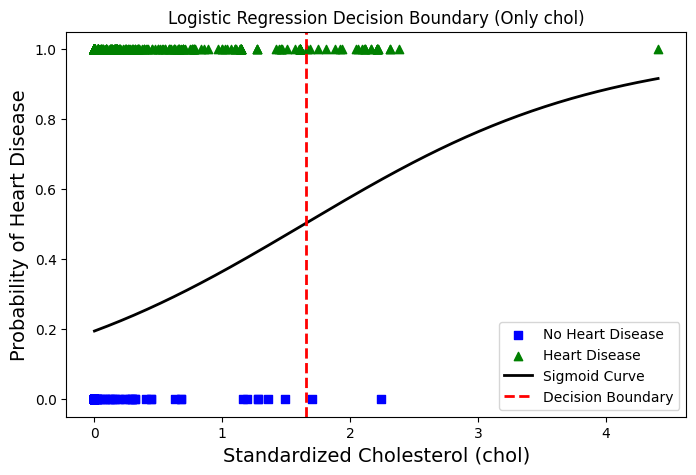

In [11]:
import numpy as np
# Ensure Cholesterol exists
assert "word_freq_addresses" in d.columns, "Cholesterol column not found!"

# Get index safely
feature_index = d.columns.get_loc("word_freq_addresses")  # Get column index safely

# Ensure X_train is a NumPy array
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

# Extract feature
X_feature = X_train[:, feature_index].reshape(-1, 1)

# Generate new feature values for smooth probability curve
X_new = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)

# Predict probability using only "Cholesterol"
X_dummy = np.zeros((300, X_train.shape[1]))
X_dummy[:, feature_index] = X_new.flatten()

y_proba = model.predict_proba(X_dummy)[:, 1]  # Probability of class 1

# ---- Plot Decision Boundary ----
plt.figure(figsize=(8, 5))
plt.scatter(X_feature[Y_train == 0], Y_train[Y_train == 0], color='blue', marker='s', label="No Heart Disease")
plt.scatter(X_feature[Y_train == 1], Y_train[Y_train == 1], color='green', marker='^', label="Heart Disease")
plt.plot(X_new, y_proba, "k-", linewidth=2, label="Sigmoid Curve")  # Sigmoid curve

# Decision boundary (probability = 0.5)
decision_boundary = X_new[y_proba >= 0.5][0]
plt.axvline(decision_boundary, color='r', linestyle="--", linewidth=2, label="Decision Boundary")

plt.xlabel("Standardized Cholesterol (chol)", fontsize=14)
plt.ylabel("Probability of Heart Disease", fontsize=14)
plt.legend()
plt.title("Logistic Regression Decision Boundary (Only chol)")
plt.show()
